In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline
import seaborn as sns

# Apply the default theme
sns.set_theme()

In [40]:
jfrac = np.load('test_fractal_2.npz')['test']

In [2]:
def downsizing_sum(a, factors):    
    """
    `a` is the N-dim input array
    `factors` is the blocksize on which averaging is to be performed
    """

    factors = np.asanyarray(factors)
    sh = np.column_stack([a.shape//factors, factors]).ravel()
    b = a.reshape(sh).sum(tuple(range(1, 2*a.ndim, 2)))

    return b

In [35]:
def entropyinter(frac):
    ''' Entropie proposée par François Semecurbe
        Questions pour localiser une paire de personne 
        Mesure de la ségregation'''
    frac[:,:,0] = frac[:,:,0] / np.sum(frac[:,:,0])
    frac[:,:,1] = frac[:,:,1] / np.sum(frac[:,:,1])
    P = frac[:,:,0] * frac[:,:,1]
    P = P / np.sum(P)
    return(-np.sum(P*np.log2(P)))

In [37]:
def entropy_segregation( frac):
    ptot = np.sum(frac, axis=2)
    Prob = frac / ptot[:, :, np.newaxis]
    #print(Prob[1,1,:])
    P0 = np.sum(frac[:,:,0]) / np.sum(frac[:,:,0] +  frac[:,:,1])
    P1 = np.sum(frac[:,:,1]) / np.sum(frac[:,:,0] +  frac[:,:,1])
    Entropie_globale = -np.log2(P0)*P0 -np.log2(P1)*P1   
    return((Entropie_globale + np.sum(np.sum(np.log2(Prob) * Prob, axis=2) * ptot) / np.sum(ptot) )/Entropie_globale )

In [8]:
def renyiq(frac,q=2): 
    return(np.log(np.sum(frac[:,:,0]**q * frac[:,:,1]**q)))

### Mise en oeuvre

In [42]:
frac = jfrac[11]


In [43]:
np.max(frac[:,:,1]/(frac[:,:,0]+frac[:,:,1])*100)

99.99451

In [44]:
import matplotlib


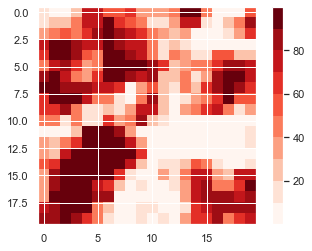

In [59]:
cmap = matplotlib.cm.get_cmap('Reds', 10)
fracd = downsizing_sum(frac,(16,16,1))
plt.imshow(fracd[:,:,1]/(fracd[:,:,0]+fracd[:,:,1])*100, cmap=cmap)
plt.colorbar()


<AxesSubplot:ylabel='Count'>

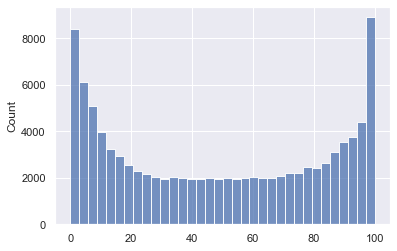

In [55]:
sns.histplot((fracd[:,:,1]/(fracd[:,:,0]+fracd[:,:,1])*100).flat)

<AxesSubplot:ylabel='Count'>

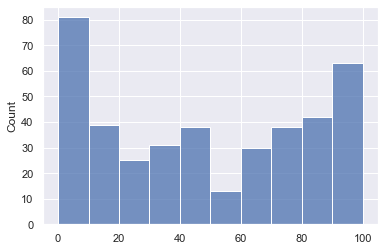

In [60]:
sns.histplot((fracd[:,:,1]/(fracd[:,:,0]+fracd[:,:,1])*100).flat)

In [47]:
entropy_segregation(fracd)

0.5272109

In [48]:
res = np.array([1,2,4,8,16,32])

In [49]:
entropies= [entropy_segregation(downsizing_sum(frac, (resi, resi, 1))) for resi in res]

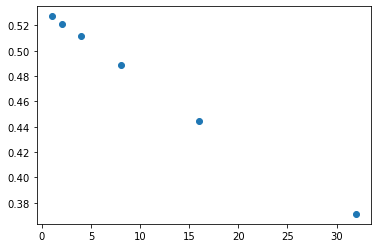

In [51]:
plt.scatter((res), entropies)

In [ ]:
reg = LinearRegression().fit(np.log2(res).reshape(-1, 1), entropies)
reg.coef_

### Variation en fonction de l

0 [-1.45271564]
1 [-1.70748043]
2 [-1.53378698]
3 [-1.42357914]
4 [-1.75502639]
5 [-1.43624611]
6 [-1.01070018]
7 [-1.83542826]
8 [-1.91139488]
9 [-2.00000019]
10 [-1.88343153]
11 [-1.78221655]
12 [-1.81182404]
13 [-1.6358897]
14 [-1.61352148]
15 [-1.66332409]
16 [-1.7783565]
17 [-1.18878047]
18 [-1.26797824]


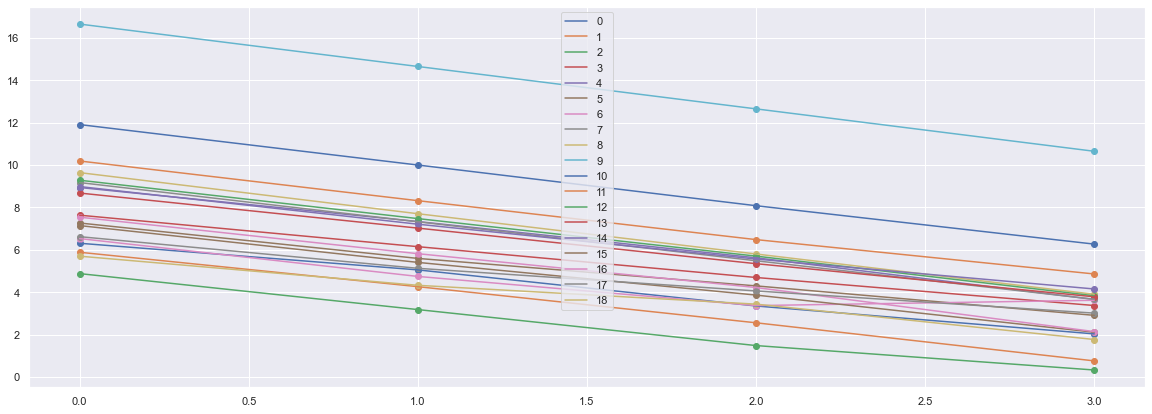

In [66]:
res = np.array([1,2,4,8])

plt.figure(figsize=(20, 7))
for j in range(jfrac.shape[0]):
    frac = jfrac[j]
    frac[:,:,0] = frac[:,:,0] / np.sum(frac[:,:,0])
    frac[:,:,1] = frac[:,:,1] / np.sum(frac[:,:,1])
    entropies= [entropyinter(downsizing_sum(frac, (resi, resi, 1))) for resi in res]
    #plt.scatter(np.log2(res), entropies)
    plt.scatter(np.log2(res), entropies)
    plt.plot(np.log2(res), entropies, label=j)
    plt.legend()

    reg = LinearRegression().fit(np.log2(res).reshape(-1, 1), entropies)
    print(j, reg.coef_)
    

### Cascade simple

In [69]:
res = np.array([1,2,4,8,16,32])

In [7]:
jfrac = np.load('cascade_simple_log.npz')

In [22]:
cascade_simple = jfrac['arr_0']
cascade_log = jfrac['arr_1']

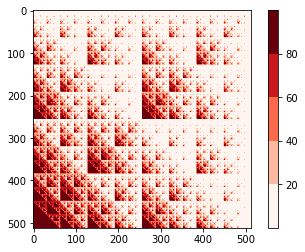

In [17]:
cmap = matplotlib.cm.get_cmap('Reds', 5)
plt.imshow(cascade_simple[:,:,1]/(cascade_simple[:,:,0]+cascade_simple[:,:,1])*100, cmap=cmap)
plt.colorbar()

In [20]:
entropies= [entropy_segregation(downsizing_sum(cascade_simple, (resi, resi, 1))) for resi in res]

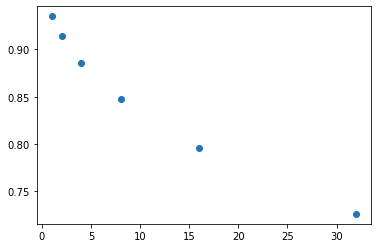

In [21]:
plt.scatter(res, entropies)

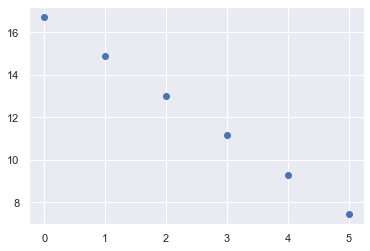

In [61]:
entropies= [entropyinter(downsizing_sum(cascade_simple, (resi, resi, 1))) for resi in res]
plt.scatter(np.log2(res), entropies)

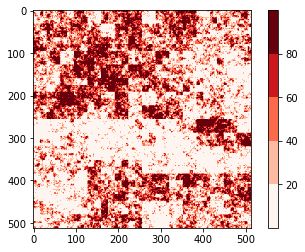

In [23]:
cmap = matplotlib.cm.get_cmap('Reds', 5)
plt.imshow(cascade_log[:,:,1]/(cascade_log[:,:,0]+cascade_log[:,:,1])*100, cmap=cmap)
plt.colorbar()

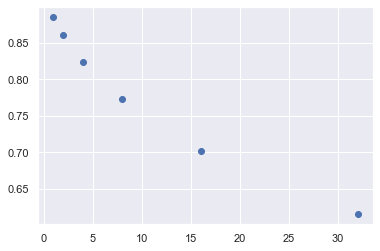

In [62]:
entropies= [entropy_segregation(downsizing_sum(cascade_log, (resi, resi, 1))) for resi in res]
plt.scatter(res, entropies)

array([-0.81150428])

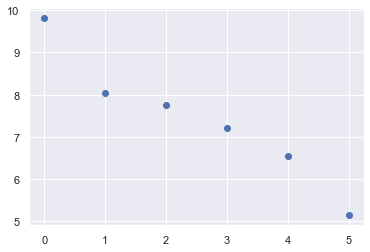

In [70]:
entropies= [entropyinter(downsizing_sum(cascade_log, (resi, resi, 1))) for resi in res]
plt.scatter(np.log2(res), entropies)
reg = LinearRegression().fit(np.log2(res).reshape(-1, 1), entropies)
reg.coef_